LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

import torch
from torch import nn

import sys
sys.path.append(r"/mnt/c/workspace/anomaly_detection/250225_/1/Dataset/3W Dataset/codes")

pip install numpy matplotlib pandas torch

In [2]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [5]:
print(os.getcwd()) 

/home/nyark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/codes


In [6]:
dir_path = r"/home/nyark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/dataset"
data_path = os.chdir(r"/home/nyark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/dataset")
print(os.listdir(data_path))

['8', '7', '5', '4', '1', '6', '0', '2', '3']


In [7]:
import os
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory
  
  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} csvs in '{dirpath}'.")


walk_through_dir(dir_path)

There are 9 directories and 0 csvs in '/home/nyark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/dataset'.
There are 0 directories and 162 csvs in '/home/nyark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/dataset/8'.
There are 0 directories and 30 csvs in '/home/nyark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/dataset/7'.
There are 0 directories and 900 csvs in '/home/nyark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/dataset/5'.
There are 0 directories and 688 csvs in '/home/nyark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/dataset/4'.
There are 0 directories and 258 csvs in '/home/nyark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/dataset/1'.
There are 0 directories and 442 csvs in '/home/nyark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/dataset/6'.
There are 0 directories and 1188 csvs in '/home/nyark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/dataset/0'.
There are 0 directories and 38 csvs 

Gather all CSV paths

In [8]:
import glob

csv_paths = glob.glob(dir_path + '/**/*.csv', recursive=True)
print(f"Found {len(csv_paths)} CSVs.")


Found 1959 CSVs.


Data Visualisation - Train Data

In [9]:
import random
import pandas as pd
from pathlib import Path

# Set seed
#random.seed(42)

# 1. Define train split folder
train_path = Path(r"/home/nyark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/train_split")

# 2. Get all CSV file paths inside train_split
train_data = list(train_path.glob("*.csv"))

if not train_data:
    raise ValueError("No CSV files found in train_split!")

# 3. Pick a random CSV file
random_file = random.choice(train_data)

# 4. Open CSV file
random_csv = pd.read_csv(random_file)

# 5. Print metadata
print(f"Random CSV path: {random_file}")
print(f"Number of rows: {random_csv.shape[0]}")
print(f"Number of columns: {random_csv.shape[1]}")
print("\nFirst 5 rows of the CSV:")

print("\nColumn Names:", random_csv.columns.tolist())
random_csv.head()

Random CSV path: /home/nyark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/train_split/WELL-00005_20170624160124.csv
Number of rows: 7103
Number of columns: 11

First 5 rows of the CSV:

Column Names: ['timestamp', 'P-PDG', 'P-TPT', 'T-TPT', 'P-MON-CKP', 'T-JUS-CKP', 'P-JUS-CKGL', 'T-JUS-CKGL', 'QGL', 'class', 'instance_label']


,timestamp,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,T-JUS-CKGL,QGL,class,instance_label
0,2017-06-24 16:01:24.000000,0.0,20791120.0,106.1876,11494450.0,66.33617,377017300.0,NaN,NaN,4,real
1,2017-06-24 16:01:25.000000,0.0,20794570.0,106.1808,11492860.0,66.33035,377005200.0,NaN,NaN,4,real
2,2017-06-24 16:01:26.000000,0.0,20796870.0,106.1763,11491270.0,66.32452,376993100.0,NaN,NaN,4,real
3,2017-06-24 16:01:27.000000,0.0,20799170.0,106.1718,11489680.0,66.31870,376981000.0,NaN,NaN,4,real
4,2017-06-24 16:01:28.000000,0.0,20791120.0,106.1763,11488090.0,66.31287,376968800.0,NaN,NaN,4,real


In [10]:
len(train_data)

1061

In [ ]:
from pathlib import Path
import random
from data_cleaning import clean_with_peer_imputation  # if saved in data_cleaning.py

# Set the full training path
train_dir = Path(r"/home/nyark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/train_split")

# Sample a few CSV files (e.g., 20 files)
all_csvs = list(train_dir.glob("*.csv"))
sample_csvs = random.sample(all_csvs, 20)

# Create a temp test directory with just the samples (optional)
# Or: run the function as-is but pass your sample list as a custom wrapper

# Temporary wrapper for testing on sample list
def clean_sample_subset(csv_files, n_peers=10, missing_threshold=3):
    return clean_with_peer_imputation(
        csv_dir=csv_files[0].parent,  # assumes all files are from same folder
        n_peers=n_peers,
        missing_threshold=missing_threshold
    )

# Clean sample
cleaned_sample = clean_sample_subset(sample_csvs)

# Inspect one cleaned result
print(f"\n🔎 Cleaned sample size: {len(cleaned_sample)}")
print(cleaned_sample[0].head())


/mnt/c/workspace/anomaly_detection/250225_/1/Dataset/3W Dataset/codes/data_cleaning.py:151: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(np.stack(padded), axis=0)
/mnt/c/workspace/anomaly_detection/250225_/1/Dataset/3W Dataset/codes/data_cleaning.py:151: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(np.stack(padded), axis=0)
/mnt/c/workspace/anomaly_detection/250225_/1/Dataset/3W Dataset/codes/data_cleaning.py:151: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(np.stack(padded), axis=0)
/mnt/c/workspace/anomaly_detection/250225_/1/Dataset/3W Dataset/codes/data_cleaning.py:151: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(np.stack(padded), axis=0)
/mnt/c/workspace/anomaly_detection/250225_/1/Dataset/3W Dataset/codes/data_cleaning.py:151: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(np.stack(padded), axis=0)
/mnt/c/workspace/anomaly_detection/250225_/1/Dataset/3W Dataset/codes/data_cleaning.py:151: RuntimeWarning: Mean of empty slice
  avg =

In [ ]:
print(cleaned_sample[0].head())

⚠️ Skipped WELL-00003_20170915170000.csv: single positional indexer is out-of-bounds
⚠️ Skipped WELL-00003_20170812170025.csv: single positional indexer is out-of-bounds
⚠️ Skipped WELL-00003_20170914160000.csv: single positional indexer is out-of-bounds
⚠️ Skipped WELL-00003_20170514060000.csv: single positional indexer is out-of-bounds
⚠️ Skipped WELL-00003_20170812070038.csv: single positional indexer is out-of-bounds
⚠️ Skipped WELL-00003_20170914210000.csv: single positional indexer is out-of-bounds
⚠️ Skipped WELL-00003_20170821140207.csv: single positional indexer is out-of-bounds
⚠️ Skipped WELL-00003_20170812020116.csv: single positional indexer is out-of-bounds
⚠️ Skipped WELL-00003_20170514160000.csv: single positional indexer is out-of-bounds
⚠️ Skipped WELL-00003_20170813130131.csv: single positional indexer is out-of-bounds
⚠️ Skipped WELL-00003_20170820230053.csv: single positional indexer is out-of-bounds
⚠️ Skipped WELL-00003_20170812220116.csv: single positional index

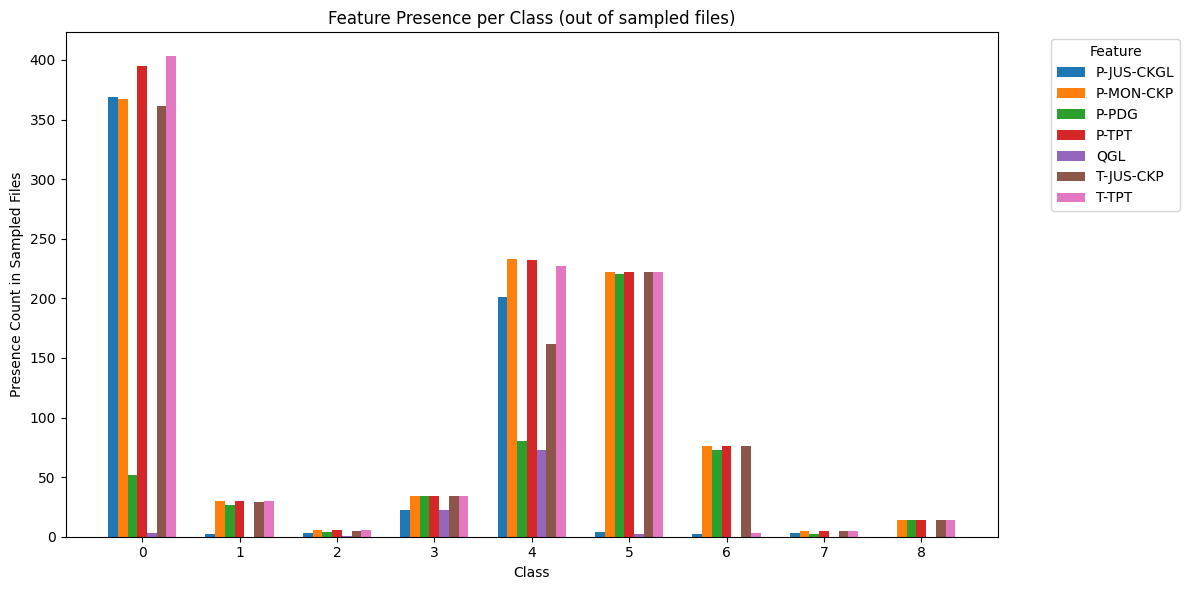

In [ ]:
csv_dir = Path(r"/home/nyark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/train_split")
csv_files = list(csv_dir.glob("*.csv"))

from data_visualisation import variation

_ = variation(csv_files, n_samples=1061)

In [ ]:
import sys
sys.path.append(r"/home/nyark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/codes")

from data_visualisation import vis_plot, corr_plot, corr_plot_clean


# Plot random samples from the train data
vis_plot(
    data_dir=train_path,
    n_samples=20,
    output_dir=r"/home/nyark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/data_visualisation_figures",
    seed=42
)

Data Corelation Check

In [ ]:
# Define your directories
output_folder = r"/home/nyark/projects/anomaly_detection/250225_/1/Dataset/3W Dataset/corr_plots"

# Call the function
corr_plot(
    data_dir=train_path,
    output_dir=output_folder,
    nrows=4,
    ncols=4
)

DATA PREPROCESSING

Data Cleaning

In [10]:
from data_cleaning import clean_with_peer_imputation
import pandas as pd
from pathlib import Path

# Datasets
train_root = r"D:\PROJECT 1\250225_인턴교육_마크\1주차\Dataset\3W Dataset\train_split"

test_root = r"D:\PROJECT 1\250225_인턴교육_마크\1주차\Dataset\3W Dataset\test_split"
val_root = r"D:\PROJECT 1\250225_인턴교육_마크\1주차\Dataset\3W Dataset\val_split"

train_data_cleaned = clean_with_peer_imputation(train_root, n_peers=10, missing_threshold=3)
test_data_cleaned = clean_with_peer_imputation(test_root, n_peers=10, missing_threshold=3)
val_data_cleaned = clean_with_peer_imputation(val_root, n_peers=10, missing_threshold=3)

# for csv_file in train_data:
#     df = pd.read_csv(csv_file)
#     df_cleaned = clean_with_imputation(df)
#     train_data_cleaned.append(df_cleaned)

# for csv_file in test_data:
#     df = pd.read_csv(csv_file)
#     df_cleaned = clean_with_imputation(df)
#     test_data_cleaned.append(df_cleaned)


# for csv_file in val_data:
#     df = pd.read_csv(csv_file)
#     df_cleaned = clean_with_imputation(df)
#     val_data_cleaned.append(df_cleaned)

print(f"\n Cleaned {len(train_data_cleaned)} train, {len(test_data_cleaned)} test and {len(val_data_cleaned)} validation files. \n Each item is a cleaned DataFrame.")

D:\PROJECT 1\250225_인턴교육_마크\1주차\Dataset\3W Dataset\codes\data_cleaning.py:151: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(np.stack(padded), axis=0)
D:\PROJECT 1\250225_인턴교육_마크\1주차\Dataset\3W Dataset\codes\data_cleaning.py:151: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(np.stack(padded), axis=0)
D:\PROJECT 1\250225_인턴교육_마크\1주차\Dataset\3W Dataset\codes\data_cleaning.py:151: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(np.stack(padded), axis=0)
D:\PROJECT 1\250225_인턴교육_마크\1주차\Dataset\3W Dataset\codes\data_cleaning.py:151: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(np.stack(padded), axis=0)
D:\PROJECT 1\250225_인턴교육_마크\1주차\Dataset\3W Dataset\codes\data_cleaning.py:151: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(np.stack(padded), axis=0)
D:\PROJECT 1\250225_인턴교육_마크\1주차\Dataset\3W Dataset\codes\data_cleaning.py:151: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(np.stack(padded), axis=0)
D:\PROJECT 1\250225_인턴교육_마크\1주차\Dataset\


 Cleaned 756 out of 1061 files.


D:\PROJECT 1\250225_인턴교육_마크\1주차\Dataset\3W Dataset\codes\data_cleaning.py:151: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(np.stack(padded), axis=0)
D:\PROJECT 1\250225_인턴교육_마크\1주차\Dataset\3W Dataset\codes\data_cleaning.py:151: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(np.stack(padded), axis=0)
D:\PROJECT 1\250225_인턴교육_마크\1주차\Dataset\3W Dataset\codes\data_cleaning.py:151: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(np.stack(padded), axis=0)
D:\PROJECT 1\250225_인턴교육_마크\1주차\Dataset\3W Dataset\codes\data_cleaning.py:151: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(np.stack(padded), axis=0)
D:\PROJECT 1\250225_인턴교육_마크\1주차\Dataset\3W Dataset\codes\data_cleaning.py:151: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(np.stack(padded), axis=0)
D:\PROJECT 1\250225_인턴교육_마크\1주차\Dataset\3W Dataset\codes\data_cleaning.py:151: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(np.stack(padded), axis=0)
D:\PROJECT 1\250225_인턴교육_마크\1주차\Dataset\


 Cleaned 195 out of 275 files.


D:\PROJECT 1\250225_인턴교육_마크\1주차\Dataset\3W Dataset\codes\data_cleaning.py:151: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(np.stack(padded), axis=0)
D:\PROJECT 1\250225_인턴교육_마크\1주차\Dataset\3W Dataset\codes\data_cleaning.py:151: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(np.stack(padded), axis=0)
D:\PROJECT 1\250225_인턴교육_마크\1주차\Dataset\3W Dataset\codes\data_cleaning.py:151: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(np.stack(padded), axis=0)
D:\PROJECT 1\250225_인턴교육_마크\1주차\Dataset\3W Dataset\codes\data_cleaning.py:151: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(np.stack(padded), axis=0)
D:\PROJECT 1\250225_인턴교육_마크\1주차\Dataset\3W Dataset\codes\data_cleaning.py:151: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(np.stack(padded), axis=0)
D:\PROJECT 1\250225_인턴교육_마크\1주차\Dataset\3W Dataset\codes\data_cleaning.py:151: RuntimeWarning: Mean of empty slice
  avg = np.nanmean(np.stack(padded), axis=0)
D:\PROJECT 1\250225_인턴교육_마크\1주차\Dataset\


 Cleaned 192 out of 274 files.

 Cleaned 756 train, 195 test and 192 validation files. 
 Each item is a cleaned DataFrame.


In [11]:
random.choice(train_data_cleaned)

,timestamp,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,T-JUS-CKGL,QGL,class,instance_label
0,2017-05-23 02:00:12.000000,0,14244000.0,116.7582,6166825.0,69.11906,3084332.0,0,0,0,real
1,2017-05-23 02:00:13.000000,0,14244000.0,116.7582,6166743.0,69.11822,3084331.0,0,0,0,real
2,2017-05-23 02:00:14.000000,0,14244000.0,116.7582,6166661.0,69.11737,3084331.0,0,0,0,real
3,2017-05-23 02:00:15.000000,0,14244000.0,116.7582,6166579.0,69.11652,3084330.0,0,0,0,real
4,2017-05-23 02:00:16.000000,0,14244000.0,116.7582,6166496.0,69.11567,3084329.0,0,0,0,real
...,...,...,...,...,...,...,...,...,...,...,...
17894,2017-05-23 06:58:26.000000,0,14229650.0,116.7513,6138601.0,69.17496,3077426.0,0,0,0,real
17895,2017-05-23 06:58:27.000000,0,14229490.0,116.7514,6138170.0,69.17458,3077426.0,0,0,0,real
17896,2017-05-23 06:58:28.000000,0,14229320.0,116.7516,6137740.0,69.17419,3077426.0,0,0,0,real
17897,2017-05-23 06:58:29.000000,0,14229160.0,116.7517,6137309.0,69.17380,3077426.0,0,0,0,real


Data Normilazation

In [12]:
from normalization import minmax_normalize, zscore_normalize

# Choose normalization method by name:
normalization_method = "minmax"  #"zscore"  or "minmax"

# Apply normalization to all cleaned DataFrames
train_data_clean_norm = []
test_data_clean_norm = []
val_data_clean_norm = []

# Normalize each DataFrame in the cleaned lists - train
for df in train_data_cleaned:
    if normalization_method.lower() == "minmax":
        df_norm = minmax_normalize(df)
    elif normalization_method.lower() == "zscore":
        df_norm = zscore_normalize(df)
    else:
        raise ValueError(f"Unknown normalization method: {normalization_method}")
    
    train_data_clean_norm.append(df_norm)

# Normalize each DataFrame in the cleaned lists - test
for df in test_data_cleaned:
    if normalization_method.lower() == "minmax":
        df_norm = minmax_normalize(df)
    elif normalization_method.lower() == "zscore":
        df_norm = zscore_normalize(df)
    else:
        raise ValueError(f"Unknown normalization method: {normalization_method}")
    
    test_data_clean_norm.append(df_norm)

# Normalize each DataFrame in the cleaned lists - val
for df in val_data_cleaned:
    if normalization_method.lower() == "minmax":
        df_norm = minmax_normalize(df)
    elif normalization_method.lower() == "zscore":
        df_norm = zscore_normalize(df)
    else:
        raise ValueError(f"Unknown normalization method: {normalization_method}")
    
    val_data_clean_norm.append(df_norm)

print(f"\n Normalized {len(train_data_clean_norm)} train {len(test_data_clean_norm)} test and {len(val_data_clean_norm)} files using '{normalization_method}' scaling.")




 Normalized 756 train 195 test and 192 files using 'minmax' scaling.


Visualise clean_norm data

In [ ]:
from pathlib import Path

clean_norm_dir = Path(r"D:\PROJECT 1\250225_인턴교육_마크\1주차\Dataset\3W Dataset\train_split_cleaned_norm")
clean_norm_dir.mkdir(parents=True, exist_ok=True)

for df, orig_file in zip(train_data_clean_norm, train_data):
    save_path = clean_norm_dir / orig_file.name
    df.to_csv(save_path, index=False)

print(f"Saved {len(train_data_clean_norm)} normalized CSVs to {clean_norm_dir}")

In [ ]:
# Plot random samples from the train data
vis_plot(
    data_dir=clean_norm_dir,
    n_samples=20,
    output_dir=r"D:\PROJECT 1\250225_인턴교육_마크\1주차\Dataset\3W Dataset\clean_norm_visualisation",
    seed=42
)

In [ ]:
#Correlation plot

output_folder = r"D:\PROJECT 1\250225_인턴교육_마크\1주차\Dataset\3W Dataset\corr_plots_clean_norm"

# Call the function
corr_plot_clean(
    data_dir=clean_norm_dir,
    output_dir=output_folder,
    nrows=4,
    ncols=4
)

Anomally Division Visualisation

In [ ]:
# Original Data Anomally Division Visualisation

from anomally_division import anomally_division

anomally_division(
    train_path=train_path,
    save_dir=Path(r"D:\PROJECT 1\250225_인턴교육_마크\1주차\Dataset\3W Dataset\anomally_division_visualisation"),
    seed=42
)

In [ ]:
#Cleaned Data Anomally Division Visualisation
from anomally_division_clean import anomally_division_clean

anomally_division_clean(
    train_path=clean_norm_dir,
    save_dir=Path(r"D:\PROJECT 1\250225_인턴교육_마크\1주차\Dataset\3W Dataset\anomally_division_vis_cleaned_norm"),
    seed=42
)

DATA LABELS

In [13]:
train_data_clean_norm[0]

,timestamp,P-PDG,P-TPT,T-TPT,P-MON-CKP,T-JUS-CKP,P-JUS-CKGL,T-JUS-CKGL,QGL,class
0,2018-09-05 20:44:36.000000,0.001342,0.997226,0.924426,0.998621,0.867568,0.0,0.0,0.0,0
1,2018-09-05 20:44:37.000000,0.001342,0.997226,0.924426,0.998621,0.867568,0.0,0.0,0.0,0
2,2018-09-05 20:44:38.000000,0.001342,0.997226,0.924426,0.998621,0.867568,0.0,0.0,0.0,0
3,2018-09-05 20:44:39.000000,0.001342,0.997226,0.924426,0.998621,0.867568,0.0,0.0,0.0,0
4,2018-09-05 20:44:40.000000,0.001342,0.997226,0.924426,0.998621,0.867568,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
172795,2018-09-07 20:44:31.000000,1.000000,0.002734,0.000000,0.000000,0.000000,0.0,0.0,0.0,1
172796,2018-09-07 20:44:32.000000,1.000000,0.002744,0.000000,0.000000,0.000000,0.0,0.0,0.0,1
172797,2018-09-07 20:44:33.000000,1.000000,0.002754,0.000000,0.000000,0.000000,0.0,0.0,0.0,1
172798,2018-09-07 20:44:34.000000,1.000000,0.002764,0.000000,0.000000,0.000000,0.0,0.0,0.0,1


In [14]:
from class_labels import class_labels, anomally_classs

# Example call on one cleaned DataFrame
df = random.choice(train_data_clean_norm)
anomally_classs(df, class_col="class", class_labels=class_labels)

Last class 5: Fast productivity loss


{np.int64(5): 'Fast productivity loss'}

FEATURE EXTRACTION

In [15]:
from data_label_split import split_X_y

X_train, y_train = split_X_y(train_data_clean_norm)

X_test, y_test = split_X_y(test_data_clean_norm)

X_val, y_val = split_X_y(val_data_clean_norm)

print(f"\n Extracted features: \n {len(X_train)} train files \n {len(X_test)} test files \n {len(X_val)} val files")

 DataFrame 1/756: X shape=(172800, 8), y=1
 DataFrame 2/756: X shape=(21600, 8), y=1
 DataFrame 3/756: X shape=(14400, 8), y=1
 DataFrame 4/756: X shape=(21600, 8), y=1
 DataFrame 5/756: X shape=(345601, 8), y=7
 DataFrame 6/756: X shape=(86401, 8), y=7
 DataFrame 7/756: X shape=(29299, 8), y=5
 DataFrame 8/756: X shape=(29299, 8), y=5
 DataFrame 9/756: X shape=(26999, 8), y=8
 DataFrame 10/756: X shape=(28799, 8), y=2
 DataFrame 11/756: X shape=(61999, 8), y=3
 DataFrame 12/756: X shape=(88800, 8), y=1
 DataFrame 13/756: X shape=(88800, 8), y=1
 DataFrame 14/756: X shape=(26999, 8), y=8
 DataFrame 15/756: X shape=(61999, 8), y=3
 DataFrame 16/756: X shape=(28799, 8), y=2
 DataFrame 17/756: X shape=(28799, 8), y=2
 DataFrame 18/756: X shape=(51999, 8), y=3
 DataFrame 19/756: X shape=(49999, 8), y=3
 DataFrame 20/756: X shape=(29299, 8), y=5
 DataFrame 21/756: X shape=(29299, 8), y=5
 DataFrame 22/756: X shape=(29299, 8), y=5
 DataFrame 23/756: X shape=(29299, 8), y=5
 DataFrame 24/756:

In [16]:
X_train[0].shape, y_train[0].shape, X_val[0].shape, y_val[0].shape, X_test[0].shape, y_test[0].shape

((172800, 8), (), (86400, 8), (), (43201, 8), ())

In [17]:
print(f"Class: {random.choice(y_train)} =>> {class_labels[random.choice(y_train)]}") 

Class: 5 =>> Normal


CONVERTING DATA INTO TORCH TENSORS

1️⃣ Models — there’s no nn.Linear, nn.Conv2d, etc.

2️⃣ Automatic differentiation — no autograd to compute gradients.

3️⃣ Optimizers — no SGD, Adam, or other optimizers to update weights.

4️⃣ Loss functions — you’d have to code all losses (cross-entropy, MSE) manually.

5️⃣ GPU acceleration — NumPy is strictly CPU-bound.

6️⃣ Training loop infrastructure — PyTorch (or TensorFlow) provides all the tools to build modern training workflows.

Vertical Concanation(row-wise training) due to differences in the number of rows

In [ ]:
# _rows = max(arr.shape[0] for arr in X_train)
# _rows

In [18]:
length = [arr.shape[0] for arr in X_train]
max_rows = int(np.percentile(length,90))
print(f"Max rows in X_train: {max_rows}")

Max rows in X_train: 29299


In [20]:
from data_cleaning import padding

#max_rows = max(arr.shape[0] for arr in X_train)
max_rows = int(np.percentile(length,90))


#Train data padding
X_train_padded = padding(X_train, max_rows)

#Val data padding
X_val_padded = padding(X_val, max_rows)

# Test data padding
X_test_padded = padding(X_test, max_rows)

In [21]:
print(f" Sample data = {X_train_padded[0]} and its class is :{y_train[0]} => {class_labels[y_train[0]]}")

 Sample data = [[0.00134174 0.99722553 0.92442571 ... 0.         0.         0.        ]
 [0.00134174 0.99722553 0.92442571 ... 0.         0.         0.        ]
 [0.00134174 0.99722553 0.92442571 ... 0.         0.         0.        ]
 ...
 [0.02807247 0.96809964 0.92847446 ... 0.         0.         0.        ]
 [0.02807247 0.96809964 0.92847446 ... 0.         0.         0.        ]
 [0.02807247 0.96809964 0.92847446 ... 0.         0.         0.        ]] and its class is :1 => Abrupt increase in BSW (Basic sediment and water)


In [22]:
X_train_padded[0].shape

(29299, 8)

In [23]:
for i, sample in enumerate(X_train_padded):
    if len(sample) != max_rows:
        print(f"Inconsistent length at index {i}: got {len(sample)}, expected {max_rows}")
print(f"All {len(X_train)} samples are consistent with {max_rows} rows")

All 756 samples are consistent with 29299 rows


In [24]:
len(X_train), len(X_train_padded)

(756, 756)

In [25]:
type(X_train_padded[0])

numpy.ndarray

In [94]:
from torch.utils.data import Dataset, DataLoader
import torch, numpy as np

class WellDataset(Dataset):
    def __init__(self, data_arrays, labels):
        """
        Args:
            data_arrays (List[np.ndarray]): each sample (n_rows, n_cols)
            labels      (List[int] or np.ndarray)
        """
        self.data   = data_arrays
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        X = self.data[idx].astype(np.float32)

        # ---- scrub NaN / +Inf / -Inf -----------------------------
        X = np.nan_to_num(X, nan=0.0, posinf=0.0, neginf=0.0)

        X_flat = X.reshape(-1)                      # (n_rows * n_cols,)
        y      = self.labels[idx]

        return torch.tensor(X_flat, dtype=torch.float32), \
               torch.tensor(y,       dtype=torch.long)


In [95]:
BATCH_SIZE = 128

train_dataset = WellDataset(X_train_padded, y_train)
train_dataloader = DataLoader(train_dataset, 
                              batch_size=BATCH_SIZE, 
                              shuffle=True)
test_dataset = WellDataset(X_test_padded, y_test)
test_dataloader = DataLoader(test_dataset,
                                batch_size=BATCH_SIZE, 
                                shuffle=False)

val_dataset = WellDataset(X_val_padded, y_val)
val_dataloader = DataLoader(val_dataset,
                                batch_size=BATCH_SIZE, 
                                shuffle=False)

In [96]:
for X_batch, y_batch in train_dataloader:
    print("X_batch shape:", X_batch.shape)
    print("y_batch shape:", y_batch.shape)
    print("batch_size, n_rows * n_cols")
    break  # Only check the first batch


X_batch shape: torch.Size([128, 234392])
y_batch shape: torch.Size([128])
batch_size, n_rows * n_cols


In [97]:
print(set(y_train))  # Must be {0, 1}


{np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.float64(6.0), np.int64(7), np.int64(8)}


MODEL_0

In [98]:
print(X_val_padded[0].shape)              # Should be (T, F)
print(X_val_padded[0].reshape(-1).shape)  # Should be (T × F,)


(29299, 8)
(234392,)


In [99]:
input_size = train_dataset[0][0].shape[0]
print(f"Input size: {input_size} (T × F)")

Input size: 234392 (T × F)


In [151]:
#Import the models
from MODELSSS import model_00, model_01

In [154]:
#MODEL_00

input_size = train_dataset[0][0].shape[0]
trained_model_0, hist = model_00(train_dataloader, val_dataloader, input_size)

[Epoch 01/10] Train: loss 6.0608 | acc 64.68%   Val: loss 1.2001 | acc 93.75%
[Epoch 02/10] Train: loss 2.8090 | acc 91.01%   Val: loss 0.3075 | acc 97.40%
[Epoch 03/10] Train: loss 1.2216 | acc 94.31%   Val: loss 0.2635 | acc 97.40%
[Epoch 04/10] Train: loss 0.7756 | acc 94.71%   Val: loss 0.0880 | acc 97.40%
[Epoch 05/10] Train: loss 0.3302 | acc 96.83%   Val: loss 0.0301 | acc 98.96%
[Epoch 06/10] Train: loss 0.2527 | acc 94.97%   Val: loss 0.0663 | acc 97.40%
[Epoch 07/10] Train: loss 0.1997 | acc 96.16%   Val: loss 0.0126 | acc 99.48%
[Epoch 08/10] Train: loss 0.1265 | acc 97.22%   Val: loss 0.0410 | acc 98.96%
[Epoch 09/10] Train: loss 0.1049 | acc 97.49%   Val: loss 0.0149 | acc 99.48%
[Epoch 10/10] Train: loss 0.0848 | acc 96.83%   Val: loss 0.0744 | acc 98.44%


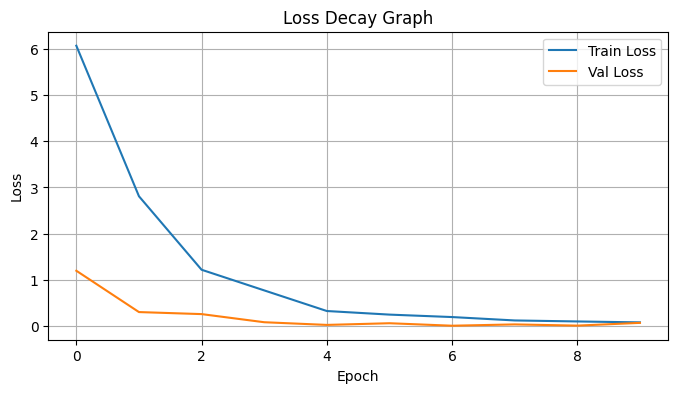

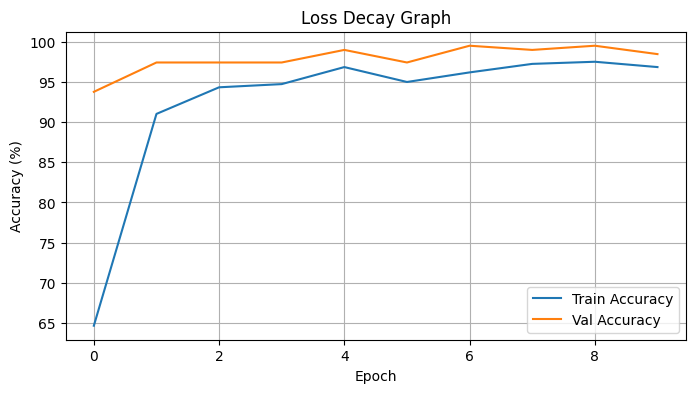

In [167]:
import matplotlib.pyplot as plt

# ---- Plot Loss ----
plt.figure(figsize=(8, 4))
plt.plot(hist["train_loss"], label="Train Loss")
plt.plot(hist["val_loss"], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Decay Graph")
plt.legend()
plt.grid(True)   # <<< this enables the grid
plt.show()

# ---- Plot Accuracy ----
plt.figure(figsize=(8, 4))
plt.plot(hist["train_acc"], label="Train Accuracy")
plt.plot(hist["val_acc"], label="Val Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Loss Decay Graph")
plt.legend()
plt.grid(True)   # <<< and here too
plt.show()


In [157]:
#MODEL_01

Learning_rate = 1e-3
No_of_epochs = 20

input_size = train_dataset[0][0].shape[0]   # after flattening
trained_model_1, hist_1 = model_01(
    train_loader     = train_dataloader,
    val_loader       = val_dataloader,
    input_size       = input_size,
    hidden_size      = 256,      # feel free to tweak
    lr               = Learning_rate,
    epochs           = No_of_epochs,
    num_classes      = 9         # adjust if different
)


[Epoch 01/20] Train: loss 1.7645 | acc 59.92%   Val: loss 1.0837 | acc 51.56%
[Epoch 02/20] Train: loss 1.1786 | acc 80.42%   Val: loss 0.6675 | acc 73.96%
[Epoch 03/20] Train: loss 0.8679 | acc 82.67%   Val: loss 0.4653 | acc 84.90%
[Epoch 04/20] Train: loss 0.5536 | acc 89.15%   Val: loss 0.3537 | acc 92.19%
[Epoch 05/20] Train: loss 0.3897 | acc 91.01%   Val: loss 0.2555 | acc 94.79%
[Epoch 06/20] Train: loss 0.3163 | acc 91.40%   Val: loss 0.1902 | acc 94.79%
[Epoch 07/20] Train: loss 0.2521 | acc 92.86%   Val: loss 0.1679 | acc 95.83%
[Epoch 08/20] Train: loss 0.1966 | acc 93.52%   Val: loss 0.1747 | acc 97.40%
[Epoch 09/20] Train: loss 0.1438 | acc 94.71%   Val: loss 0.1547 | acc 97.92%
[Epoch 10/20] Train: loss 0.1184 | acc 96.83%   Val: loss 0.1338 | acc 98.44%
[Epoch 11/20] Train: loss 0.1033 | acc 96.83%   Val: loss 0.1258 | acc 98.96%
[Epoch 12/20] Train: loss 0.0910 | acc 97.22%   Val: loss 0.1303 | acc 98.96%
[Epoch 13/20] Train: loss 0.0883 | acc 97.22%   Val: loss 0.1055

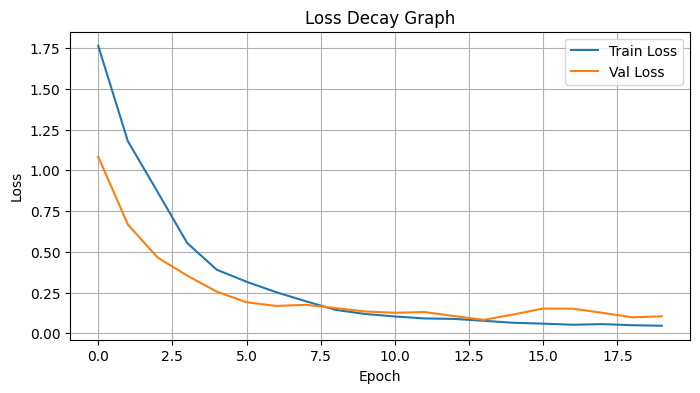

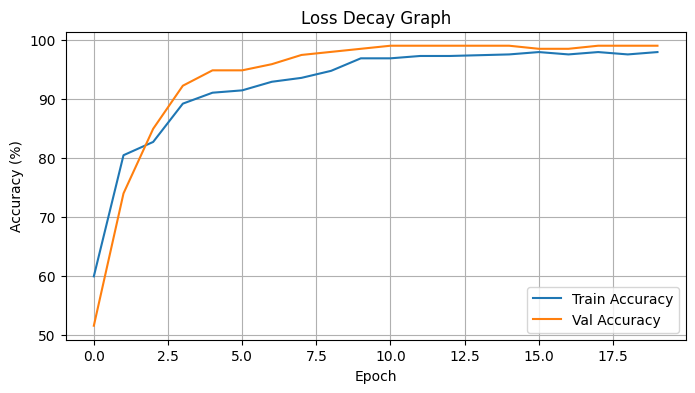

In [168]:
import matplotlib.pyplot as plt

# ---- Plot Loss ----
plt.figure(figsize=(8, 4))
plt.plot(hist_1["train_loss"], label="Train Loss")
plt.plot(hist_1["val_loss"], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Decay Graph")
plt.legend()
plt.grid(True)   # <<< this enables the grid
plt.show()

# ---- Plot Accuracy ----
plt.figure(figsize=(8, 4))
plt.plot(hist_1["train_acc"], label="Train Accuracy")
plt.plot(hist_1["val_acc"], label="Val Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Loss Decay Graph")
plt.legend()
plt.grid(True)   # <<< and here too
plt.show()


In [132]:
inputs, labels = next(iter(train_dataloader))
print("Has NaN in inputs? ", torch.isnan(inputs).any().item())
print("Max abs value     :", inputs.abs().max().item())
print("Label range       :", labels.min().item(), "→", labels.max().item())


Has NaN in inputs?  False
Max abs value     : 1.0
Label range       : 0 → 8


In [ ]:
trained_model_1.eval()
all_preds = []
all_labels = []

# Get device from model
device = next(trained_model_1.parameters()).device

with torch.no_grad():
    for X_batch, y_batch in test_dataloader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)

        outputs = trained_model_1(X_batch)
        _, preds = torch.max(outputs, 1)

        all_preds.append(preds)
        all_labels.append(y_batch)

# Concatenate and compute accuracy
all_preds = torch.cat(all_preds)
all_labels = torch.cat(all_labels)

accuracy = (all_preds == all_labels).float().mean()
print(f" Test Accuracy: {accuracy:.2%}")


 Test Accuracy: 97.44%


In [138]:
import torch, numpy as np

# ---------- parameters ----------
k = 10                 # how many random samples
seed = None            # set e.g. 42 for reproducibility, or leave None

# ---------- choose random indices ----------
rng = np.random.default_rng(seed)
idx = rng.choice(len(X_test_padded), size=k, replace=False)   # unique indices

# ---------- fetch & flatten ----------
X_batch = [X_test_padded[i] for i in idx]      # list of (T,F) arrays
y_true  = [y_test[i]         for i in idx]     # list/array of ints

X_batch_flat = torch.stack([
    torch.tensor(sample.reshape(-1), dtype=torch.float32)
    for sample in X_batch
])

# ---------- run through the model ----------
device = next(trained_model_1.parameters()).device   # cpu or cuda
trained_model_1.eval()
with torch.no_grad():
    outputs = trained_model_1(X_batch_flat.to(device))
    y_pred = torch.argmax(outputs, dim=1).cpu().tolist()

# ---------- display results ----------
print(" idx │ true → pred")
print("─────┼────────────")
for i, (tid, t, p) in enumerate(zip(idx, y_true, y_pred)):
    print(f"{tid:4d} │  {t}   →  {p}")


 idx │ true → pred
─────┼────────────
   1 │  7   →  7
 101 │  4   →  0
 169 │  0   →  0
  41 │  5   →  5
   8 │  3   →  3
  25 │  5   →  5
  17 │  3   →  3
 166 │  0   →  0
  86 │  5   →  5
  19 │  3   →  3


CONFUSION MATRIX, LOSS FXN GRAPH 

In [139]:
#  compute predictions (already on device)
trained_model_1.eval()
y_true_all, y_pred_all = [], []

with torch.no_grad():
    for X_batch, y_batch in test_dataloader:
        X_batch = X_batch.to(next(trained_model_1.parameters()).device)
        preds = trained_model_1(X_batch).argmax(1).cpu()
        y_true_all.append(y_batch)
        y_pred_all.append(preds)

y_true_all = torch.cat(y_true_all).numpy()
y_pred_all = torch.cat(y_pred_all).numpy()


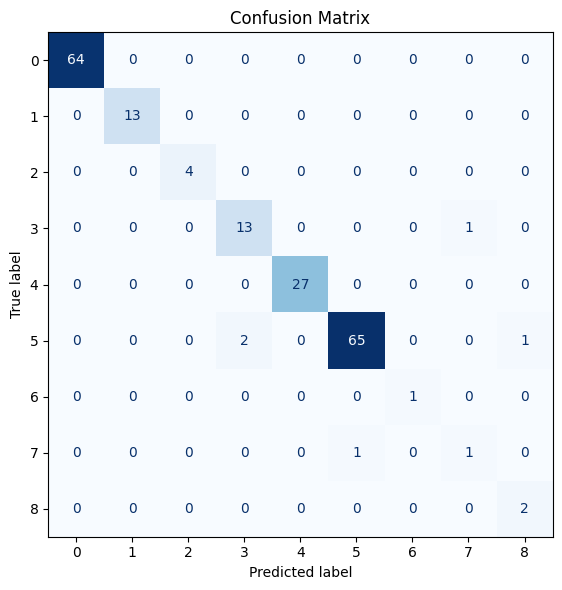

In [140]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

num_classes = len(np.unique(np.concatenate([y_true_all, y_pred_all])))
cm = confusion_matrix(y_true_all, y_pred_all, labels=np.arange(num_classes))

fig, ax = plt.subplots(figsize=(6,6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=np.arange(num_classes))
disp.plot(ax=ax, cmap="Blues", values_format="d", colorbar=False)
ax.set_title("Confusion Matrix")
plt.tight_layout()
plt.show()


In [169]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Example: all_preds and all_labels from model output
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
            xticklabels=range(9), yticklabels=range(9))
plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.grid(False)
plt.tight_layout()
plt.show()


TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.